# Kidney Segmentation Tutorial
Start by importing dependencies and doing a few bits of housekeeping.

In [1]:
import os

import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.segmentation import whole_kidney

# Ensure figures are rendered in the notebook
%matplotlib inline

# Initialise output path for segmentations
directory = 'segmentation_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

## Whole Kidney Segmentation
A binary mask defining each voxel as kidney or not kidney can be generated from a $T_2$-weighted fast spin echo (FSE) image
using the methods outlined in [Daniel AJ et al. Automated renal segmentation in healthy and chronic kidney disease subjects using a convolutional neural network. Magnetic Resonance in Medicine 2021;86:1125–1136](https://doi.org/10.1002/mrm.28768).

We'll start off by getting some test data and doing a basic binary segmentation to categorise each voxel as renal tissue or not renal tissue.

2/2 [==============================] - 3s 827ms/step


(-0.5, 255.5, -0.5, 255.5)

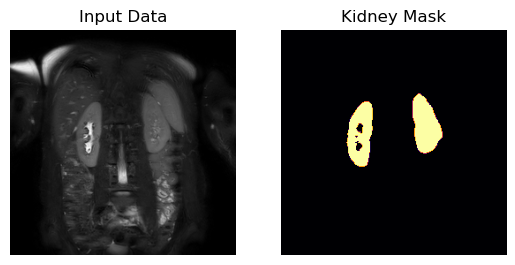

In [2]:
# Get test data
image, affine = fetch.t2w_volume_philips()

# The segmentor needs both the image array and affine so the size of each voxel is known. post_process=True removes all but
# the largest two areas in the mask e.g. removes small areas of incorrectly categorised tissue. This can cause issues if the
# subject has more or less than two kidneys though. By default, a binary mask of renal tissue is generated. If the binary
# flag is set to False, the output will be the probability each voxel is renal tissue.
segmentation = whole_kidney.Segmentation(image, affine, post_process=True, binary=True)

# Get the mask as a numpy array
mask = segmentation.get_mask()

# Display the results
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image[:, :, 7].T, origin='lower', cmap='gray')
ax1.set_title('Input Data')
ax1.axis('off')
ax2.imshow(mask[:, :, 7].T, origin='lower', cmap='inferno')
ax2.set_title('Kidney Mask')
ax2.axis('off')

The segmentor can also output a mask for each kidney with the left kidney as 1 and the right kidney as 2 or each kidney individually. Additionally, Total, Left and Right Kidney Volume (TKV, LKV and RKV) can be output in units of ml.


TKV = 240.00 ml
LKV = 118.19 ml
RKV = 121.81 ml


(-0.5, 255.5, -0.5, 255.5)

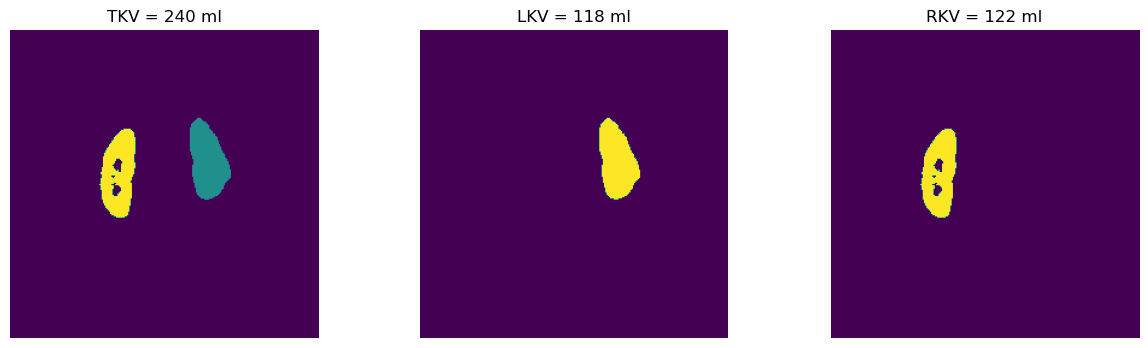

In [3]:
kidneys = segmentation.get_kidneys()
left_kidney = segmentation.get_left_kidney()
right_kidney = segmentation.get_right_kidney()

# Print kidney volumes.
print(f'TKV = {segmentation.get_tkv():.2f} ml\n'
      f'LKV = {segmentation.get_lkv():.2f} ml\n'
      f'RKV = {segmentation.get_rkv():.2f} ml')

# Alternatively the volumes can be retrieved as a dictionary or saved as a csv.
volumes = segmentation.get_volumes()
segmentation.save_volumes_csv(os.path.join(OUTPUT_DIR, 'volumes.csv'))

# Display individual kidney masks.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.imshow(kidneys[:, :, 7].T, origin='lower')
ax1.set_title(f"TKV = {volumes['total']:.0f} ml")
ax1.axis(False)
ax2.imshow(left_kidney[:, :, 7].T, origin='lower')
ax2.set_title(f"LKV = {volumes['left']:.0f} ml")
ax2.axis(False)
ax3.imshow(right_kidney[:, :, 7].T, origin='lower')
ax3.set_title(f"RKV = {volumes['right']:.0f} ml")
ax3.axis(False)

Finally, we can save the masks and NIfTIs. Here all possible output options are explicitly listed; the same result could be
achieved by simply using `maps='all'`.

In [4]:
segmentation.to_nifti(output_directory=OUTPUT_DIR, base_file_name='Sub_01', maps=['mask', 'left', 'right', 'individual'])